In [126]:
#import salaries (1).json data in and read it
import polars as pl
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns  

# Open the file for reading into a df
# Define the file path?
file_path = 'salaries (1).json'

# Read the file into a dataframe
df = pl.read_json(file_path)

# Display the dataframe
print(df)     


shape: (9_268, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ work_year ┆ experienc ┆ employmen ┆ job_title ┆ … ┆ employee_ ┆ remote_ra ┆ company_l ┆ company_ │
│ ---       ┆ e_level   ┆ t_type    ┆ ---       ┆   ┆ residence ┆ tio       ┆ ocation   ┆ size     │
│ str       ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆           ┆   ┆ str       ┆ i64       ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆           ┆           ┆          │
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆       

In [127]:
#filter and count total for each employment_type for CT,FL,FT,PT?

#filter and count total for contract employment_type
employmentTypeCount = (
    df
    .groupby('employment_type')
    .agg(
        employmentType_total = pl.count()
    )
    )
print(employmentTypeCount)



shape: (4, 2)
┌─────────────────┬──────────────────────┐
│ employment_type ┆ employmentType_total │
│ ---             ┆ ---                  │
│ str             ┆ u32                  │
╞═════════════════╪══════════════════════╡
│ CT              ┆ 19                   │
│ PT              ┆ 15                   │
│ FT              ┆ 9222                 │
│ FL              ┆ 12                   │
└─────────────────┴──────────────────────┘


/tmp/ipykernel_22877/2520150901.py:6: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('employment_type')


In [128]:
#filter and count total for employee_residence
employmentResidenceCount = (
    df
    .groupby('employee_residence')
    .agg(
        employmentResidence_total = pl.count()
    )
    .sort('employmentResidence_total')
    .reverse()
    .head(10)
    )
print(employmentResidenceCount)

shape: (10, 2)
┌────────────────────┬───────────────────────────┐
│ employee_residence ┆ employmentResidence_total │
│ ---                ┆ ---                       │
│ str                ┆ u32                       │
╞════════════════════╪═══════════════════════════╡
│ US                 ┆ 7942                      │
│ GB                 ┆ 436                       │
│ CA                 ┆ 220                       │
│ ES                 ┆ 117                       │
│ …                  ┆ …                         │
│ FR                 ┆ 54                        │
│ PT                 ┆ 26                        │
│ AU                 ┆ 21                        │
│ NL                 ┆ 21                        │
└────────────────────┴───────────────────────────┘


/tmp/ipykernel_22877/1496646664.py:4: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('employee_residence')


In [129]:
fullTime = ['FT']
theStates = ['US']

#filter out employment type full time and employee residence US
employmentDataFilter = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
)
print(employmentDataFilter)

shape: (7_929, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ work_year ┆ experienc ┆ employmen ┆ job_title ┆ … ┆ employee_ ┆ remote_ra ┆ company_l ┆ company_ │
│ ---       ┆ e_level   ┆ t_type    ┆ ---       ┆   ┆ residence ┆ tio       ┆ ocation   ┆ size     │
│ str       ┆ ---       ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆           ┆   ┆ str       ┆ i64       ┆ str       ┆ str      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆           ┆           ┆          │
│ 2023      ┆ SE        ┆ FT        ┆ Data      ┆ … ┆ US        ┆ 0         ┆ US        ┆ M        │
│           ┆           ┆           ┆ Engineer  ┆   ┆           ┆       

In [130]:
#filter and count total for job_title
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total = pl.count()
    )
    )
print(employeeJobTitle)

shape: (101, 2)
┌───────────────────────────────┬────────────────────────┐
│ job_title                     ┆ employeeJobTitle_total │
│ ---                           ┆ ---                    │
│ str                           ┆ u32                    │
╞═══════════════════════════════╪════════════════════════╡
│ Decision Scientist            ┆ 36                     │
│ Business Intelligence Manager ┆ 2                      │
│ Data Science Consultant       ┆ 33                     │
│ Data Architect                ┆ 195                    │
│ …                             ┆ …                      │
│ Data Management Specialist    ┆ 4                      │
│ Data Quality Engineer         ┆ 2                      │
│ Applied Scientist             ┆ 268                    │
│ Data Integration Specialist   ┆ 6                      │
└───────────────────────────────┴────────────────────────┘


/tmp/ipykernel_22877/2802393274.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


In [131]:
#filter and count total for job_title show top 10 jobs
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total=pl.count()
    )
    .sort('employeeJobTitle_total')  
    .reverse()
    .head(52)  # Selecting the top 10 rows
    
)

print(employeeJobTitle)


shape: (52, 2)
┌─────────────────────────────┬────────────────────────┐
│ job_title                   ┆ employeeJobTitle_total │
│ ---                         ┆ ---                    │
│ str                         ┆ u32                    │
╞═════════════════════════════╪════════════════════════╡
│ Data Engineer               ┆ 1895                   │
│ Data Scientist              ┆ 1683                   │
│ Data Analyst                ┆ 1198                   │
│ Machine Learning Engineer   ┆ 840                    │
│ …                           ┆ …                      │
│ Data Integration Specialist ┆ 6                      │
│ Data Product Manager        ┆ 6                      │
│ Data Developer              ┆ 6                      │
│ Principal Data Scientist    ┆ 5                      │
└─────────────────────────────┴────────────────────────┘


/tmp/ipykernel_22877/2913539598.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


In [132]:
#filter and count total for job_title show top 10 jobs
fullTime = ['FT']
theStates = ['US']
employeeJobTitle = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('job_title')
    .agg(
        employeeJobTitle_total=pl.count()
    )
    .sort('employeeJobTitle_total')  
    .reverse()
    .head(42)  # Selecting the top 10 rows
    
)

print(employeeJobTitle)


shape: (42, 2)
┌───────────────────────────────────┬────────────────────────┐
│ job_title                         ┆ employeeJobTitle_total │
│ ---                               ┆ ---                    │
│ str                               ┆ u32                    │
╞═══════════════════════════════════╪════════════════════════╡
│ Data Engineer                     ┆ 1895                   │
│ Data Scientist                    ┆ 1683                   │
│ Data Analyst                      ┆ 1198                   │
│ Machine Learning Engineer         ┆ 840                    │
│ …                                 ┆ …                      │
│ MLOps Engineer                    ┆ 10                     │
│ Data Science Practitioner         ┆ 10                     │
│ Machine Learning Software Engine… ┆ 9                      │
│ Deep Learning Engineer            ┆ 8                      │
└───────────────────────────────────┴────────────────────────┘


/tmp/ipykernel_22877/2462033275.py:8: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('job_title')


In [133]:
#filter and count total for remote_ratio
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employmentRemote = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('remote_ratio')
    .agg(
        employmentRemote_total = pl.count()
    )
    )
print(employmentRemote)

shape: (3, 2)
┌──────────────┬────────────────────────┐
│ remote_ratio ┆ employmentRemote_total │
│ ---          ┆ ---                    │
│ i64          ┆ u32                    │
╞══════════════╪════════════════════════╡
│ 0            ┆ 3521                   │
│ 100          ┆ 2075                   │
│ 50           ┆ 20                     │
└──────────────┴────────────────────────┘


/tmp/ipykernel_22877/2727686209.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('remote_ratio')


In [134]:
#filter and count total for experience_level
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('experience_level')
    .agg(
        employeeExperienceLevel_total = pl.count()
    )
    )
print(employeeExperienceLevel)

shape: (4, 2)
┌──────────────────┬───────────────────────────────┐
│ experience_level ┆ employeeExperienceLevel_total │
│ ---              ┆ ---                           │
│ str              ┆ u32                           │
╞══════════════════╪═══════════════════════════════╡
│ EN               ┆ 224                           │
│ MI               ┆ 902                           │
│ SE               ┆ 4346                          │
│ EX               ┆ 144                           │
└──────────────────┴───────────────────────────────┘


/tmp/ipykernel_22877/2162794735.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('experience_level')


In [135]:
#filter and count total for experience_level
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('experience_level')
    .agg(
        employeeExperienceLevel_total = pl.count()
    )
    )
print(employeeExperienceLevel)

shape: (4, 2)
┌──────────────────┬───────────────────────────────┐
│ experience_level ┆ employeeExperienceLevel_total │
│ ---              ┆ ---                           │
│ str              ┆ u32                           │
╞══════════════════╪═══════════════════════════════╡
│ SE               ┆ 4346                          │
│ EN               ┆ 224                           │
│ EX               ┆ 144                           │
│ MI               ┆ 902                           │
└──────────────────┴───────────────────────────────┘


/tmp/ipykernel_22877/2162794735.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('experience_level')


In [136]:
#filter and count total for company_size
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employerCompanySize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('company_size')
    .agg(
        employerCompanySize_total = pl.count()
    )
    )
print(employerCompanySize)

/tmp/ipykernel_22877/1734881984.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('company_size')


shape: (3, 2)
┌──────────────┬───────────────────────────┐
│ company_size ┆ employerCompanySize_total │
│ ---          ┆ ---                       │
│ str          ┆ u32                       │
╞══════════════╪═══════════════════════════╡
│ L            ┆ 203                       │
│ M            ┆ 5385                      │
│ S            ┆ 28                        │
└──────────────┴───────────────────────────┘


In [137]:
#filter and count total for salary_in_usd
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalary = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd')
    .agg(
        employeeSalary_total = pl.count()
    )
    )
print(employeeSalary)

/tmp/ipykernel_22877/3801413792.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd')


shape: (1_091, 2)
┌───────────────┬──────────────────────┐
│ salary_in_usd ┆ employeeSalary_total │
│ ---           ┆ ---                  │
│ str           ┆ u32                  │
╞═══════════════╪══════════════════════╡
│ 25000         ┆ 1                    │
│ 184100        ┆ 2                    │
│ 119610        ┆ 2                    │
│ 212500        ┆ 1                    │
│ …             ┆ …                    │
│ 370000        ┆ 4                    │
│ 236500        ┆ 2                    │
│ 226000        ┆ 2                    │
│ 170625        ┆ 1                    │
└───────────────┴──────────────────────┘


In [138]:
#filter and count total for salary_in_usd
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalary = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd')
    .agg(
        employeeSalary_total = pl.count()
    )
    .sort('employeeSalary_total')
    .reverse()
    .head(10)
    )
print(employeeSalary)


/tmp/ipykernel_22877/268392807.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd')


shape: (10, 2)
┌───────────────┬──────────────────────┐
│ salary_in_usd ┆ employeeSalary_total │
│ ---           ┆ ---                  │
│ str           ┆ u32                  │
╞═══════════════╪══════════════════════╡
│ 160000        ┆ 142                  │
│ 150000        ┆ 139                  │
│ 130000        ┆ 134                  │
│ 120000        ┆ 110                  │
│ …             ┆ …                    │
│ 145000        ┆ 85                   │
│ 200000        ┆ 80                   │
│ 180000        ┆ 78                   │
│ 135000        ┆ 78                   │
└───────────────┴──────────────────────┘


In [139]:
#filter and count total for salary_in_usd with experience_level showing 
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalaryWExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd', 'experience_level')
    .agg(
        employeeSalaryWExperienceLevel = pl.count()
    )
    )
print(employeeSalaryWExperienceLevel)

/tmp/ipykernel_22877/1391258399.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd', 'experience_level')


shape: (1_383, 3)
┌───────────────┬──────────────────┬────────────────────────────────┐
│ salary_in_usd ┆ experience_level ┆ employeeSalaryWExperienceLevel │
│ ---           ┆ ---              ┆ ---                            │
│ str           ┆ str              ┆ u32                            │
╞═══════════════╪══════════════════╪════════════════════════════════╡
│ 100000        ┆ MI               ┆ 45                             │
│ 133000        ┆ SE               ┆ 4                              │
│ 58400         ┆ SE               ┆ 2                              │
│ 70000         ┆ MI               ┆ 14                             │
│ …             ┆ …                ┆ …                              │
│ 211500        ┆ SE               ┆ 1                              │
│ 138000        ┆ EN               ┆ 1                              │
│ 91000         ┆ EN               ┆ 1                              │
│ 111775        ┆ MI               ┆ 1                              │
└─

In [140]:
#filter and count total for salary_in_usd with experience_level showing 
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
employeeSalaryWExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby('salary_in_usd', 'experience_level')
    .agg(
        employeeSalaryWExperienceLevel = pl.count()
    )
    .sort('employeeSalaryWExperienceLevel')
    .reverse()
    .head(10)
    )
print(employeeSalaryWExperienceLevel)
#roughpush

# this is a test of adding some lines - ah

/tmp/ipykernel_22877/613496495.py:10: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('salary_in_usd', 'experience_level')


shape: (10, 3)
┌───────────────┬──────────────────┬────────────────────────────────┐
│ salary_in_usd ┆ experience_level ┆ employeeSalaryWExperienceLevel │
│ ---           ┆ ---              ┆ ---                            │
│ str           ┆ str              ┆ u32                            │
╞═══════════════╪══════════════════╪════════════════════════════════╡
│ 160000        ┆ SE               ┆ 106                            │
│ 130000        ┆ SE               ┆ 97                             │
│ 150000        ┆ SE               ┆ 94                             │
│ 140000        ┆ SE               ┆ 87                             │
│ …             ┆ …                ┆ …                              │
│ 170000        ┆ SE               ┆ 60                             │
│ 200000        ┆ SE               ┆ 60                             │
│ 175000        ┆ SE               ┆ 59                             │
│ 180000        ┆ SE               ┆ 59                             │
└────

In [197]:
#Find Number of Jobs by year and then display in line graph
# Define the filters
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

# Initialize an empty dictionary to store job title data
job_title_data = {}

# Filter and count total for each job title by work_year
for job_title in top4jobtitles:
    employeeExperienceLevelwJobTitle = (
        df
        .filter(pl.col('employment_type').is_in(fullTime))
        .filter(pl.col('employee_residence').is_in(theStates))
        .filter(pl.col('job_title') == job_title)
        .groupby(['work_year'])
        .agg([
            pl.count().alias('job_count')
        ])
    )

    # Convert to pandas DataFrame
    employeeExperienceLevelwJobTitle_df = employeeExperienceLevelwJobTitle.to_pandas()

    # Store the job title data in the dictionary
    job_title_data[job_title] = employeeExperienceLevelwJobTitle_df

# Get the 'work_year' column from one of the job title DataFrames for sorting
work_years = job_title_data[top4jobtitles[0]]['work_year']

# Combine all the data into a single DataFrame
combined_df = pd.concat(job_title_data, axis=1)

# Sort the combined data by 'work_year'
combined_df = combined_df.sort_values(by=work_years.name)

# Plotting in a line graph
plt.figure(figsize=(10, 6))
for job_title in top4jobtitles:
    plt.plot(combined_df[work_years.name], combined_df[('job_count', job_title)], marker='o', linestyle='-', label=job_title)

plt.title('Number of Jobs by Year for Top 4 Job Titles')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.legend(title='Job Title')
plt.show()



/tmp/ipykernel_22877/1836566689.py:17: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_22877/1836566689.py:17: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_22877/1836566689.py:17: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])
/tmp/ipykernel_22877/1836566689.py:17: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['work_year'])


KeyError: 'work_year'

/tmp/ipykernel_22877/2687079604.py:15: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/2687079604.py:27: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


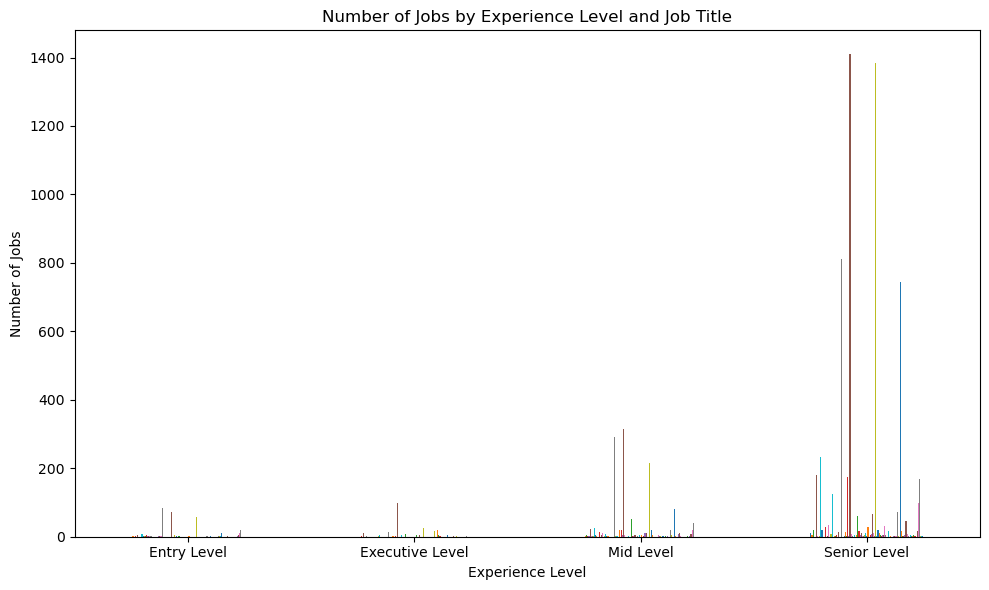

In [147]:
#Find Number of Jobs by experience level and then display in bar graph
#filter and count total for experience_level 
fullTime = ['FT']
theStates = ['US']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

employeeExperienceLevel = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevel_df = employeeExperienceLevel.to_pandas()

# Pivot the DataFrame in Pandas
pivot_data_df = employeeExperienceLevel_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data_df.plot(kind='bar', ax=ax, legend=False)
ax.set_xticklabels(pivot_data_df.index, rotation=0)
plt.title('Number of Jobs by Experience Level and Job Title')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.show()


/tmp/ipykernel_22877/3843390205.py:16: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/3843390205.py:29: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


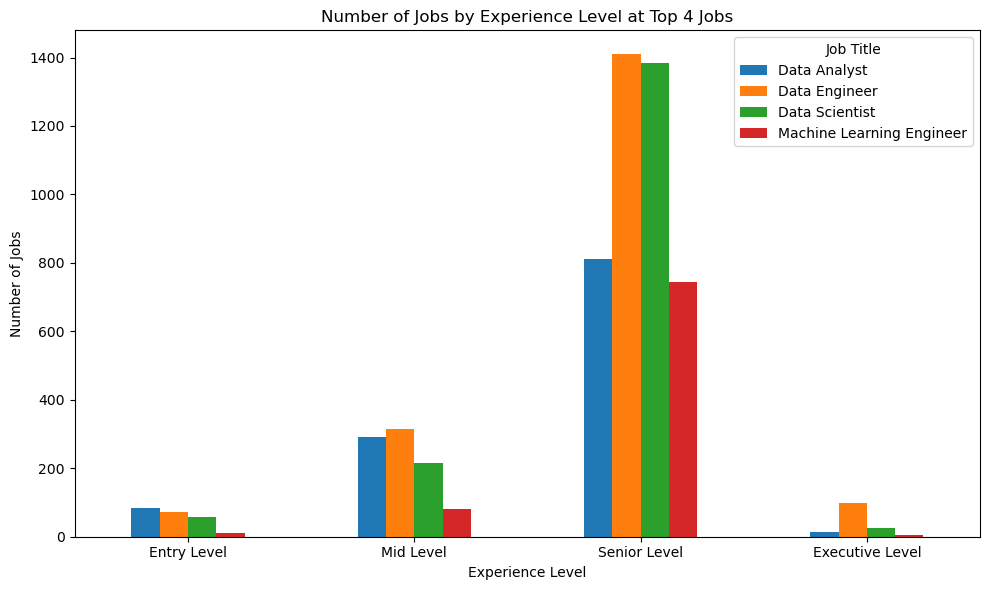

In [152]:
#Find Number of Jobs by experience level and then display in bar graph
#filter and count total for experience_level and top 4 job titles
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping
fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

employeeExperienceLevelwTop4Jobs = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwTop4Jobs_df = employeeExperienceLevelwTop4Jobs.to_pandas()

# Pivot the DataFrame in Pandas
pivot_data_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Define the desired order of experience levels based on your mapping
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# Convert the pivot_data_df index to a CategoricalIndex with the specified order
pivot_data_df.index = pd.CategoricalIndex(pivot_data_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_data_df.sort_index(inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
pivot_data_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_data_df.index, rotation=0)
plt.title('Number of Jobs by Experience Level at Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/25514002.py:21: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/25514002.py:30: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level', 'job_title'])


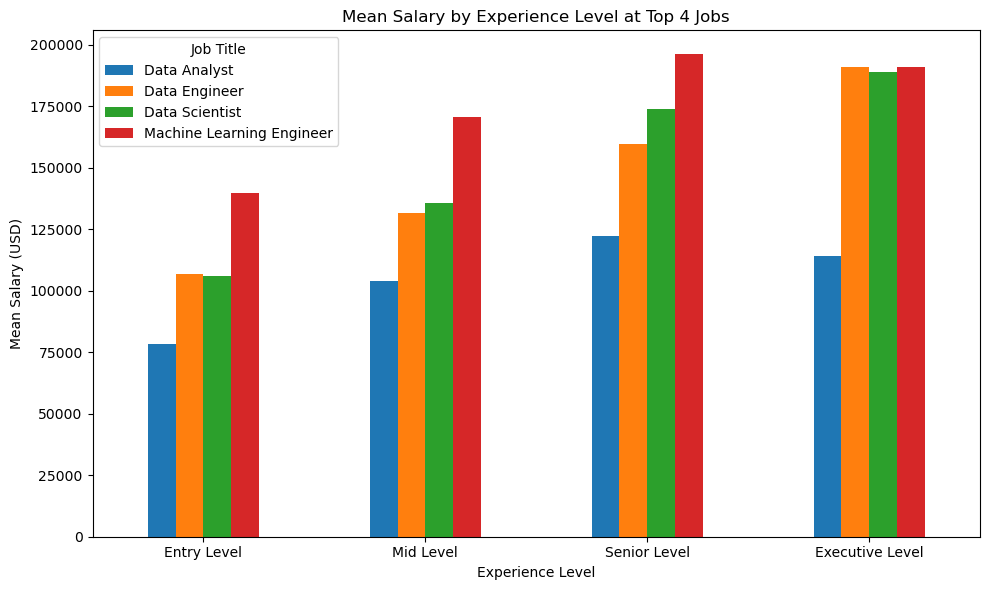

In [181]:
#Find Number of Jobs by experience level and then display in bar graph
#filter, count total for experience_level and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwTop4Jobs = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwTop4Jobs_df = employeeExperienceLevelwTop4Jobs.to_pandas()

# Pivot the DataFrame in Pandas for job count
pivot_count_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='job_count', 
    fill_value=0
)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwTop4Jobs_df.pivot_table(
    index='experience_level', 
    columns='job_title', 
    values='mean_salary', 
    fill_value=0
)

# Define the desired order of experience levels based on your mapping
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level at Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Job Title')
plt.tight_layout()
plt.show()

In [192]:
# code to find salary to match external analysis with own data set
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']

# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filter for 'Mid Level' and 'Senior Level' experience levels
filtered_df = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('experience_level').is_in(['Mid Level', 'Senior Level']))
)

# Define the job titles you want to include
job_titles_to_include = ['AI Engineer', 'Business Intelligence Developer', 'Computer Vision Engineer', 'Data Architect',
                         'Data Analyst', 'Data Engineer', 'Data Modeler', 'Data Scientist', 'Database Engineer',
                         'Machine Learning Engineer', 'Data Warehouse Analyst', 'Data Warehouse Developer', 'Database Administrator']

# Initialize lists to store data for Mid Level and Senior Level
mid_level_job_titles = []
mid_level_lowest_salaries = []
mid_level_highest_salaries = []

senior_level_job_titles = []
senior_level_lowest_salaries = []
senior_level_highest_salaries = []

# Loop through each job title and find the lowest and highest salaries for each experience level
for job_title in job_titles_to_include:
    mid_level_filtered_df = filtered_df.filter((pl.col('job_title') == job_title) & (pl.col('experience_level') == 'Mid Level'))
    senior_level_filtered_df = filtered_df.filter((pl.col('job_title') == job_title) & (pl.col('experience_level') == 'Senior Level'))
    
    if not mid_level_filtered_df.is_empty():
        mid_level_lowest_salary = mid_level_filtered_df['salary_in_usd'].min()
        mid_level_highest_salary = mid_level_filtered_df['salary_in_usd'].max()
        
        mid_level_job_titles.append(job_title)
        mid_level_lowest_salaries.append(mid_level_lowest_salary)
        mid_level_highest_salaries.append(mid_level_highest_salary)
    else:
        mid_level_job_titles.append(job_title)
        mid_level_lowest_salaries.append(None)
        mid_level_highest_salaries.append(None)
    
    if not senior_level_filtered_df.is_empty():
        senior_level_lowest_salary = senior_level_filtered_df['salary_in_usd'].min()
        senior_level_highest_salary = senior_level_filtered_df['salary_in_usd'].max()
        
        senior_level_job_titles.append(job_title)
        senior_level_lowest_salaries.append(senior_level_lowest_salary)
        senior_level_highest_salaries.append(senior_level_highest_salary)
    else:
        senior_level_job_titles.append(job_title)
        senior_level_lowest_salaries.append(None)
        senior_level_highest_salaries.append(None)

# Create DataFrames for Mid Level and Senior Level
mid_level_salary_table = pd.DataFrame({
    'Job Title': mid_level_job_titles,
    'Lowest Salary (Mid Level)': mid_level_lowest_salaries,
    'Highest Salary (Mid Level)': mid_level_highest_salaries
})

senior_level_salary_table = pd.DataFrame({
    'Job Title': senior_level_job_titles,
    'Lowest Salary (Senior Level)': senior_level_lowest_salaries,
    'Highest Salary (Senior Level)': senior_level_highest_salaries
})

# Display the tables
print("Mid Level Salaries:")
print(mid_level_salary_table)
print("Senior Level Salaries:")
print(senior_level_salary_table)

Mid Level Salaries:
                          Job Title  Lowest Salary (Mid Level)  \
0                       AI Engineer                   120000.0   
1   Business Intelligence Developer                   110000.0   
2          Computer Vision Engineer                        NaN   
3                    Data Architect                    90000.0   
4                      Data Analyst                    36000.0   
5                     Data Engineer                    24000.0   
6                      Data Modeler                    73100.0   
7                    Data Scientist                    51962.0   
8                 Database Engineer                        NaN   
9         Machine Learning Engineer                    50000.0   
10           Data Warehouse Analyst                        NaN   
11         Data Warehouse Developer                        NaN   
12           Database Administrator                        NaN   

    Highest Salary (Mid Level)  
0                     

/tmp/ipykernel_22877/3435854578.py:20: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')


/tmp/ipykernel_22877/2926044165.py:22: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')


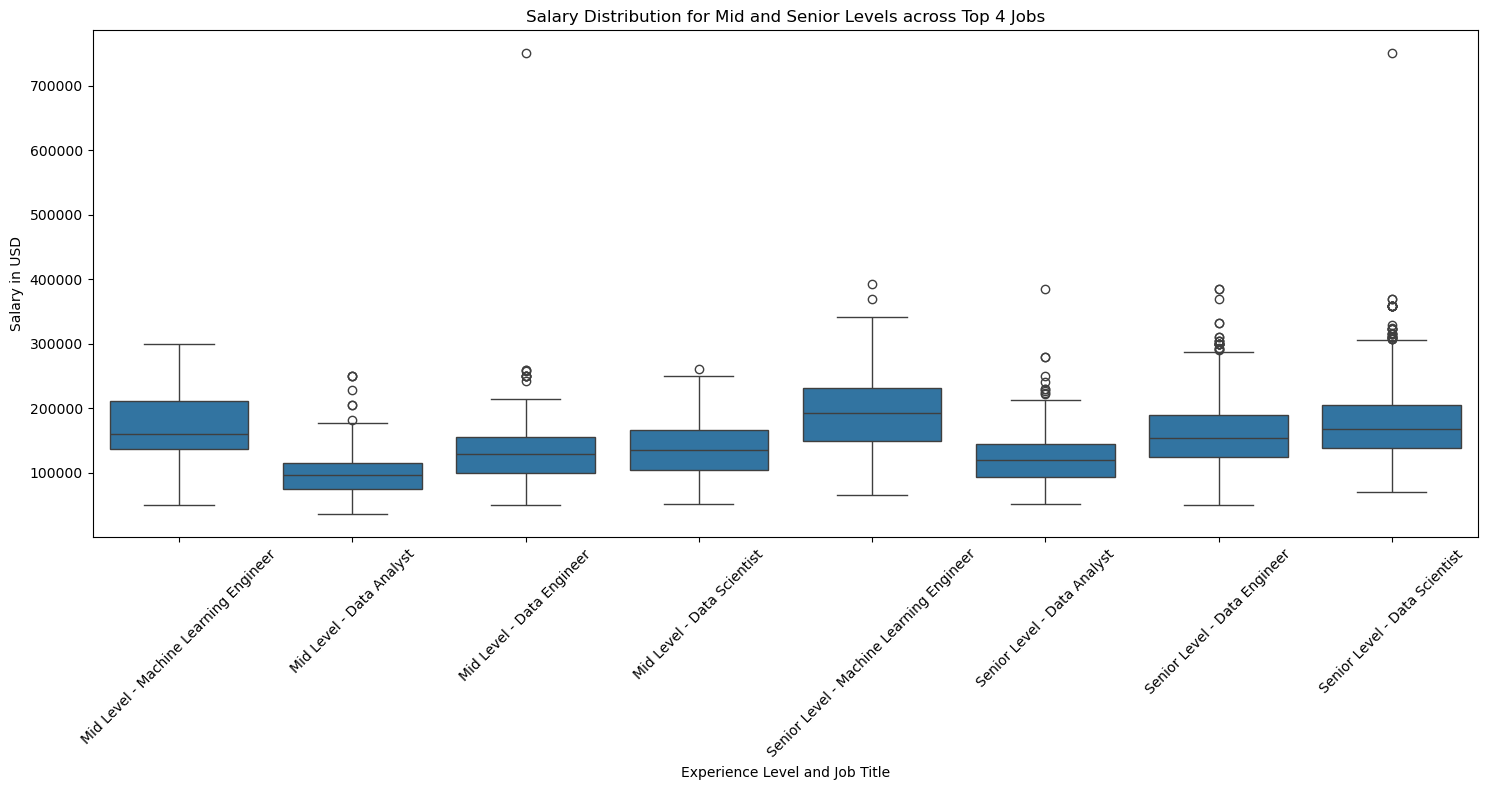

In [188]:
#Find Number of Jobs by experience level and then display in box plot
#filter, count total for experience_level and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']

# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering the data
filtered_df = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .filter(pl.col('experience_level').is_in(['Mid Level', 'Senior Level']))
    .filter(pl.col('work_year').is_in(['2023'])) 
)

# Convert to pandas DataFrame
filtered_df = filtered_df.to_pandas()

# Create a new column combining experience level and job title
filtered_df['exp_job'] = filtered_df['experience_level'] + ' - ' + filtered_df['job_title']

# Define the desired order of experience levels and job titles
exp_job_order = [level + ' - ' + job for level in ['Mid Level', 'Senior Level'] for job in top4jobtitles]

# Convert the exp_job column to a Categorical type with the specified order
filtered_df['exp_job'] = pd.Categorical(filtered_df['exp_job'], categories=exp_job_order, ordered=True)

# Plotting the box plot for salary distribution
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='exp_job', y='salary_in_usd', data=filtered_df)
plt.xticks(rotation=45)
plt.title('Salary Distribution for Mid and Senior Levels across Top 4 Jobs')
plt.xlabel('Experience Level and Job Title')
plt.ylabel('Salary in USD')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/4193945339.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby('company_size')


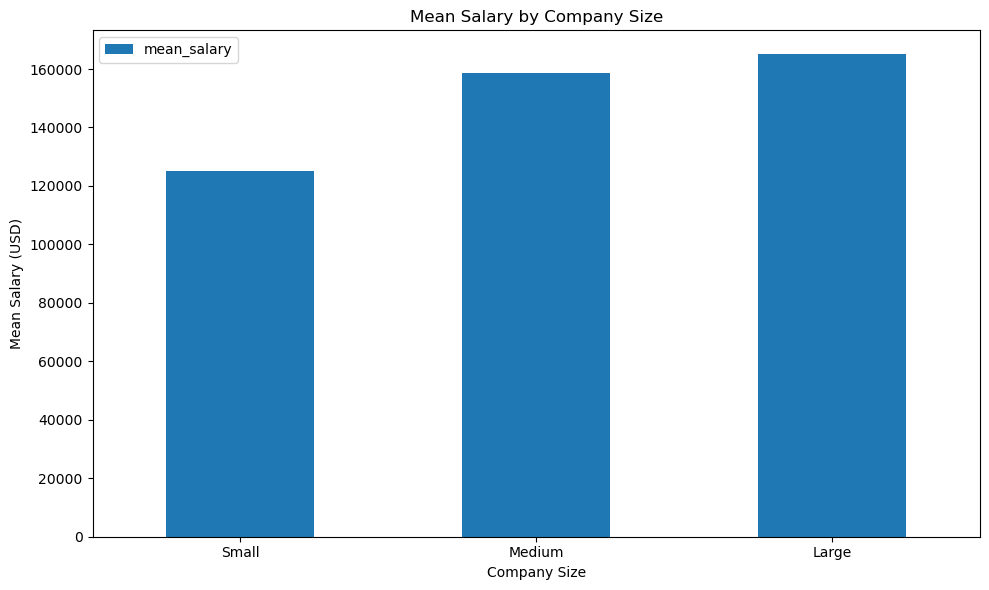

In [170]:
#Find average Salary by  company size
#filter, count total for company_size and find mean salary_in_usd 
# Convert 'salary_in_usd' to numeric
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
# Dictionary for company size names
company_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Filtering and grouping with mean salary calculation
employeeSalaryByCompanySize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby('company_size')
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeSalaryByCompanySize_df = employeeSalaryByCompanySize.to_pandas()

# Map the company_size to names
employeeSalaryByCompanySize_df['company_size'] = employeeSalaryByCompanySize_df['company_size'].map(company_names)

# Define the desired order of company sizes
company_order = ['Small', 'Medium', 'Large']

# Convert the company_size column to a Categorical type with the specified order
employeeSalaryByCompanySize_df['company_size'] = pd.Categorical(employeeSalaryByCompanySize_df['company_size'], categories=company_order, ordered=True)

# Sorting the DataFrame by the new categorical company_size
employeeSalaryByCompanySize_df.sort_values(by='company_size', inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
employeeSalaryByCompanySize_df.plot(x='company_size', y='mean_salary', kind='bar', ax=ax)
ax.set_xticklabels(employeeSalaryByCompanySize_df['company_size'], rotation=0)
plt.title('Mean Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Mean Salary (USD)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/4184199835.py:27: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/4184199835.py:35: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level','company_size', 'job_title'])


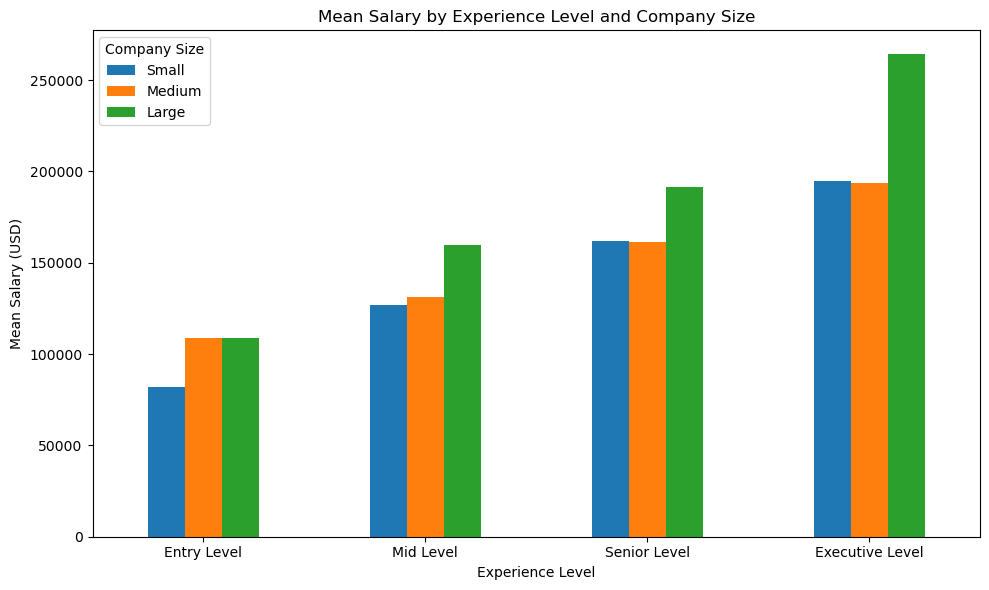

In [175]:
#Find average Salary by Experience Level and company size
#filter, count total for company_size and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Dictionary for company size names
company_size_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwcompanysize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .groupby(['experience_level','company_size', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwcompanysize_df = employeeExperienceLevelwcompanysize.to_pandas()

# Map the company_size to names
employeeExperienceLevelwcompanysize_df['company_size'] = employeeExperienceLevelwcompanysize_df['company_size'].map(company_size_names)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwcompanysize_df.pivot_table(
    index='experience_level', 
    columns='company_size', 
    values='mean_salary', 
    fill_value=0,
    aggfunc='mean'
)

# Define the desired order of experience levels and company sizes
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
company_size_order = ['Small', 'Medium', 'Large']

# Reorder the columns based on company size
pivot_salary_df = pivot_salary_df[company_size_order]

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level and Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()

/tmp/ipykernel_22877/1872394933.py:28: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
/tmp/ipykernel_22877/1872394933.py:37: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  .groupby(['experience_level','company_size', 'job_title'])


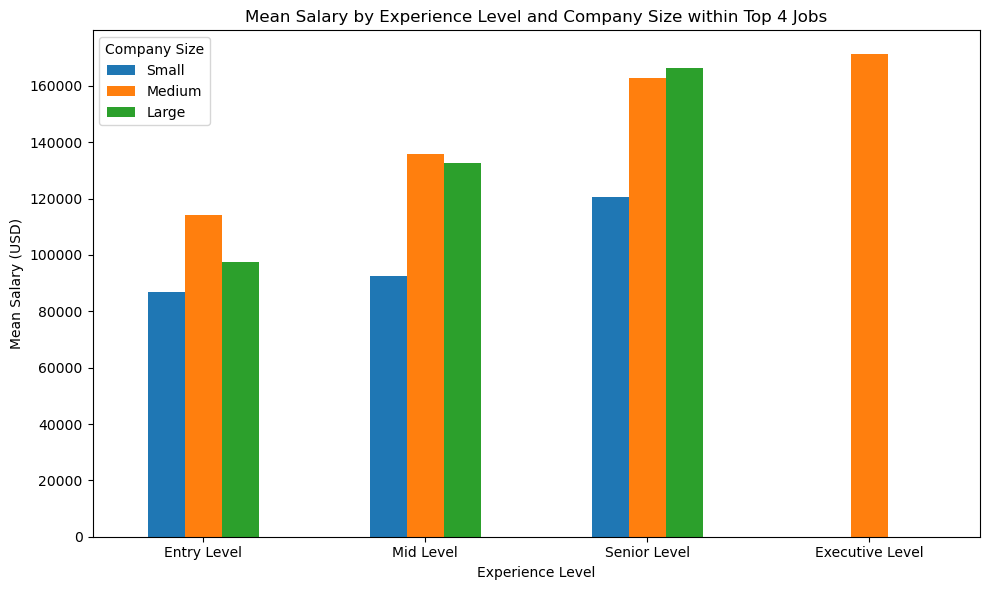

In [193]:
#Find average Salary by Experience Level and company size
#filter, count total for company_size and top 4 job_titles and find mean salary_in_usd of each job by experience_level
# Convert 'salary_in_usd' to numeric if it's not already
df = df.with_columns([
    pl.col('salary_in_usd').cast(pl.Float64)
])

fullTime = ['FT']
theStates = ['US']
top4jobtitles = ['Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist']
# Dictionary for experience level names
experience_level_names = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}

# Dictionary for company size names
company_size_names = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Apply the mapping to the experience_level column
df = df.with_columns([
    pl.col('experience_level').apply(lambda x: experience_level_names.get(x, x)).alias('experience_level')
])

# Filtering and grouping with mean salary calculation
employeeExperienceLevelwcompanysize = (
    df
    .filter(pl.col('employment_type').is_in(fullTime))
    .filter(pl.col('employee_residence').is_in(theStates))
    .filter(pl.col('job_title').is_in(top4jobtitles))
    .groupby(['experience_level','company_size', 'job_title'])
    .agg([
        pl.count().alias('job_count'),
        pl.mean('salary_in_usd').alias('mean_salary')
    ])
)

# Convert to pandas DataFrame
employeeExperienceLevelwcompanysize_df = employeeExperienceLevelwcompanysize.to_pandas()

# Map the company_size to names
employeeExperienceLevelwcompanysize_df['company_size'] = employeeExperienceLevelwcompanysize_df['company_size'].map(company_size_names)

# Pivot the DataFrame in Pandas for mean salary
pivot_salary_df = employeeExperienceLevelwcompanysize_df.pivot_table(
    index='experience_level', 
    columns='company_size', 
    values='mean_salary', 
    fill_value=0,
    aggfunc='mean'
)

# Define the desired order of experience levels and company sizes
experience_level_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
company_size_order = ['Small', 'Medium', 'Large']

# Reorder the columns based on company size
pivot_salary_df = pivot_salary_df[company_size_order]

# Convert the pivot_salary_df index to a CategoricalIndex with the specified order
pivot_salary_df.index = pd.CategoricalIndex(pivot_salary_df.index, categories=experience_level_order, ordered=True)

# Sort the DataFrame by the new categorical index
pivot_salary_df.sort_index(inplace=True)

# Plotting for mean salary
fig, ax = plt.subplots(figsize=(10, 6))
pivot_salary_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(pivot_salary_df.index, rotation=0)
plt.title('Mean Salary by Experience Level and Company Size within Top 4 Jobs')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary (USD)')
plt.legend(title='Company Size')
plt.tight_layout()
plt.show()